<a href="https://colab.research.google.com/github/rajagopalmotivate1/DeepLearningHandsonWorkshop/blob/master/1_5_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import  layers
from keras import models
from keras.datasets import mnist
from keras import  utils


Using TensorFlow backend.


In [2]:
model = models.Sequential()
layer1c = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )
layer1m = layers.MaxPooling2D(pool_size=(2,2), strides=2)
layer2c = layers.Conv2D(64, (3,3), activation='relu')
layer2m = layers.MaxPooling2D(2,2)

model.add(layer1c)
model.add(layer1m)
model.add(layer2c)
model.add(layer2m)

layerFlatten = layers.Flatten()
layerd1 = layers.Dense(64, activation='relu')
layerd2 = layers.Dense(10, activation='softmax' )

model.add( layerFlatten )
model.add( layerd1 )
model.add( layerd2 )
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                102464    
_________________________________________________________________
dens

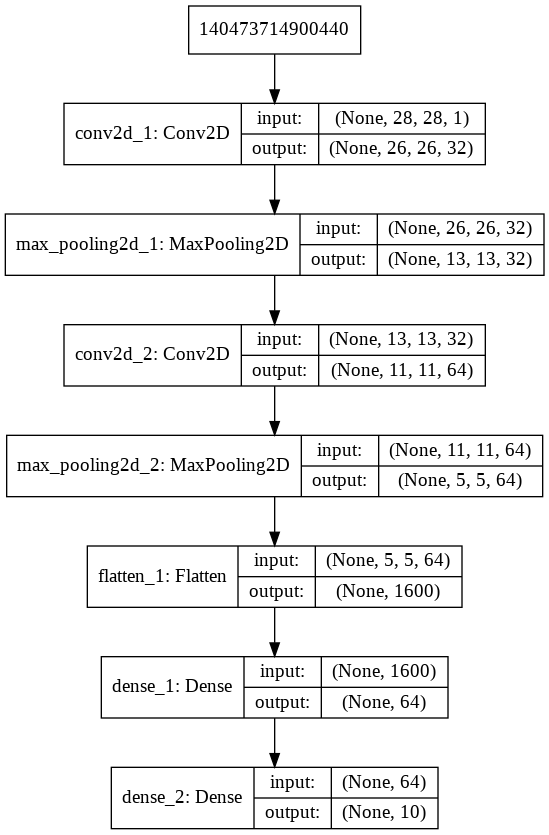

In [8]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, show_shapes=True, show_layer_names=True, to_file='my1stcnnmodel.png')
Image(retina=True, filename='my1stcnnmodel.png')

In [3]:

(trainX, trainY), (testX, testY) = mnist.load_data()

print("No of Training samples = " + str(len(trainX)) )
print("No of Test samples = " + str(len(testX)) )

trainSetSize = len(trainX)
testSetSize = len(testX)

trainX = trainX[0:trainSetSize]
trainY = trainY[0:trainSetSize]

testX = testX[0:testSetSize]
testY = testY[0:testSetSize]


trainX = trainX.astype('float') * 1 /255
testX = testX.astype('float') * 1 /255

print( "Shape of trainX = " + str(trainX.shape) )


trainXready = trainX.reshape((trainSetSize, 28, 28, 1))
testXready = testX.reshape((testSetSize, 28, 28, 1))

print( "Shape of trainXready = " + str(trainXready.shape) )


trainYready = utils.to_categorical(trainY)
testYready = utils.to_categorical(testY)


11493376/11490434 [==============================] - 1s 0us/step
No of Training samples = 60000
No of Test samples = 10000
Shape of trainX = (60000, 28, 28)
Shape of trainXready = (60000, 28, 28, 1)


In [4]:

model.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'] )

# batchsize 32, epoch 20, Test Accracy 
# batchsize 64, epoch 5 , Test Accuracy 99.16%

model.fit(trainXready, trainYready, batch_size=32, epochs=4)



Instructions for updating:
Use tf.cast instead.
Epoch 1/4
60000/60000 [==============================] - 18s 302us/step - loss: 0.1332 - acc: 0.9583
Epoch 2/4
60000/60000 [==============================] - 14s 230us/step - loss: 0.0460 - acc: 0.9859
Epoch 3/4
60000/60000 [==============================] - 14s 229us/step - loss: 0.0338 - acc: 0.9899
Epoch 4/4
60000/60000 [==============================] - 14s 227us/step - loss: 0.0263 - acc: 0.9921


In [5]:

testLoss, testAccuracy = model.evaluate(testXready,testYready)

print("Test Accuracy : " + str(testAccuracy) )

10000/10000 [==============================] - 1s 92us/step
Test Accuracy : 0.9893
